In [13]:
#Importing required libraries for data analysis and machine learning
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for machine learning model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
#Load the data
df = pd.read_csv("student_performance.csv")

In [16]:
# Displaying the first 5 rows of the dataset
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [18]:
#Checking the number of rows and columns in the dataset
print(df.shape)

(1000000, 6)


In [19]:
#Getting general information about the dataset
#such as data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [20]:
#Generating descriptive statistics for numerical columns
df.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [21]:
#Checking missing values in each column
df.isnull().sum()

,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


In [ ]:
#There are no missing values in the dataset,
#so no additional data cleaning is required at this stage.

In [22]:
#Creating a target variable based on total score
#Students with total score >= 60 are labeled as 'Pass'
df['pass'] = np.where(df['total_score'] >= 60, 1, 0)

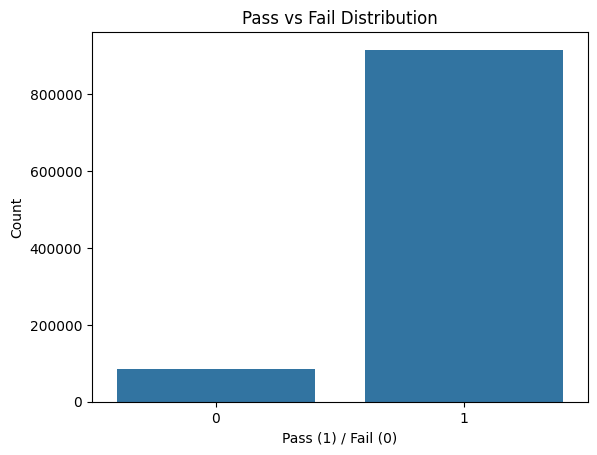

In [23]:
#Checking the distribution of the target variable
sns.countplot(x='pass', data=df)
plt.title("Pass vs Fail Distribution")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Count")
plt.show()


In [ ]:
#The dataset is highly imbalanced.
#This means accuracy alone may not be a reliable evaluation metric.


In [24]:
#Selecting features and target variable
X = df.drop(['pass', 'student_id'], axis=1)
y = df['pass']


In [25]:
#Encoding categorical features
le = LabelEncoder()
X['grade'] = le.fit_transform(X['grade'])


In [26]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
#Training a Logistic Regression model with class weight to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
#Making predictions on the test set
y_pred = model.predict(X_test)

#Evaluating model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.99537
[[ 16978      0]
 [   926 182096]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16978
           1       1.00      0.99      1.00    183022

    accuracy                           1.00    200000
   macro avg       0.97      1.00      0.99    200000
weighted avg       1.00      1.00      1.00    200000



In [29]:
#Removing total_score to prevent data leakage
X = df.drop(['pass', 'student_id', 'total_score'], axis=1)


In [32]:
#Encoding categorical features using LabelEncoder
le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [33]:
#Encoding categorical variables to make the dataset compatible
#with machine learning algorithms that require numerical input


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.899935
[[ 16871    107]
 [ 19906 163116]]
              precision    recall  f1-score   support

           0       0.46      0.99      0.63     16978
           1       1.00      0.89      0.94    183022

    accuracy                           0.90    200000
   macro avg       0.73      0.94      0.78    200000
weighted avg       0.95      0.90      0.92    200000



In [ ]:
#Initial model results were unrealistically high due to data leakage,
#as the target variable was derived from the total_score feature.
#After removing total_score and properly encoding categorical variables,
#the model provides a more realistic and reliable evaluation.
